In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [ ]:
# 히스토그램 : 변수가 하나
df =pd.read_csv('dataset/auto-mpg.csv', header=None)

#열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df['mpg'].plot(kind='hist', bins=10, figsize=(10,5), color='skyblue')
plt.title("mpg histogram")
plt.xlabel('mpg')
plt.show()

In [ ]:
# scatter : 2개의 변수
# cylender : 3개의 변수
# bubble : cylinders_size로 점의 크기 변경
cyliners_size = df.cylinders / df.cylinders.max()*300
print(cyliners_size)
df.plot(kind='scatter', x='weight', y='mpg', figsize=(10,5), color='skyblue', s=cyliners_size,
       alpha=0.2)
plt.title('mpg - weight scatter')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [ ]:
# scatter : 2개의 변수
# cylender_size를 컬러맵으로 사용

cyliners_size = df.cylinders / df.cylinders.max()*300
print(cyliners_size)
df.plot(kind='scatter', x='weight', y='mpg', figsize=(10,5), c=cyliners_size,
       alpha=0.2, s=40, cmap='viridis', marker='+')
plt.title('mpg - weight scatter')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.savefig('img/scatter.png') # 이미지 저장
plt.show()

In [ ]:
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

In [ ]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

In [5]:
import seaborn as sns

In [112]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


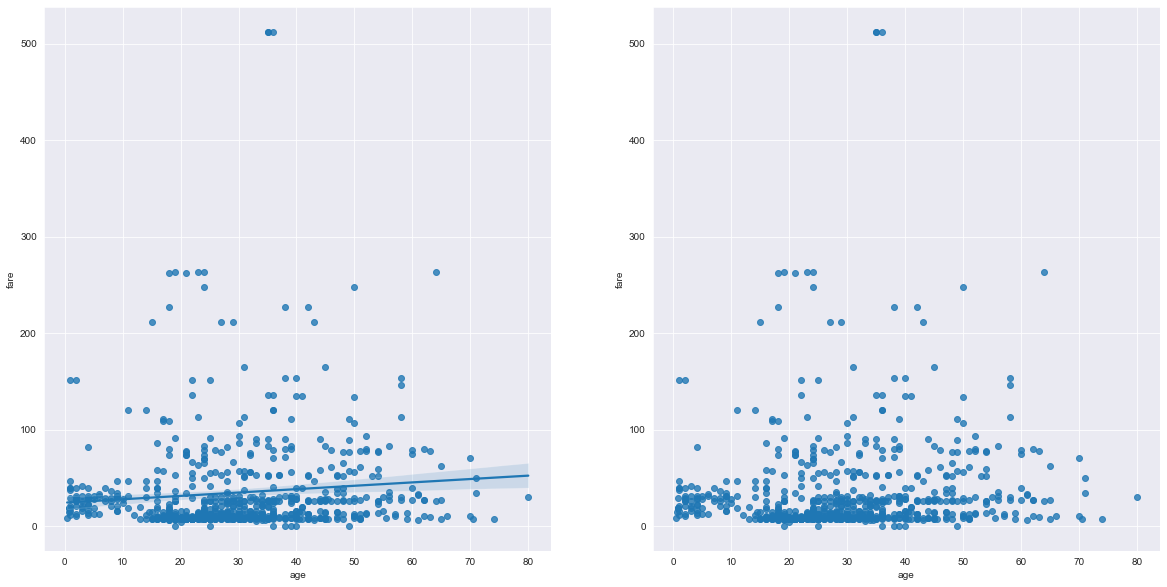

In [113]:
# 회귀선이 있는 scatter 그래프, 회귀선이 없는 2개의 그래프
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x='age', y='fare',
           data=titanic,
           ax=ax1)
sns.regplot(x='age', y='fare',
           data=titanic,
           ax=ax2,
           fit_reg=False)
plt.show()

In [ ]:
# distplot() : 커널 밀도
# 스타일 테마 설정 (darkgrid, whitegrid, dark, white, )
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# distplot
sns.distplot(x=titanic.fare, ax=ax1) 

# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2) 

# histplot
sns.histplot(x='fare', data=titanic,  ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kedplot')
ax3.set_title('titanic fare - histplot')

plt.show()

In [ ]:
# heatmap
sns.set_style('darkgrid')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)
plt.show()

In [ ]:
# 지도 그래프
import folium

In [ ]:
# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', 
                        zoom_start=15)

# 지도를 HTML 파일로 저장하기
seoul_map2.save('./dataset/seoul2.html')
seoul_map3.save('./dataset/seoul3.html')

In [ ]:
df = pd.read_excel('dataset/서울지역 대학교 위치.xlsx')
df.info()

seoul_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
    
seoul_map.save('dataset/seoul.html')
df

In [ ]:
df = pd.read_excel('dataset/서울지역 대학교 위치.xlsx', header=None, skiprows=1)
df.columns = ['학교명', '위도', '경도']

df.set_index('학교명', inplace=True)
df.head(10)

In [ ]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                    radius=10,         # 원의 반지름
                    color='brown',     # 원의 둘레 색상
                    fill=True,
                    fill_color='coral', # 원을 채우는 색
                    fill_opacity=0.7, # 투명도
                    popup=name).add_to(seoul_map)
seoul_map.save('dataset/seoul_curcle.html')

In [ ]:
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = 'dataset/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine= 'openpyxl')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = 'dataset/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('./gyonggipopulation' + year + '.html')

In [38]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# deck 칼럼의 값들의 갯수를 새어 봄 df.value_counts() : 유니크한 값들의 갯수
print(df['deck'].value_counts())
deck_cnt = df['deck'].value_counts(dropna=False) # Nan 데이터 계산하기
print(deck_cnt)

# isnull() 메서드로 누락된 데이터 찾기, null 이면 True, 값이 있으면 False 반환
print(df['deck'].head().isnull())
print()

In [18]:
# isnull()과 sum() 함수를 사용하여 누락된 데이터 갯수 확인
print(df['deck'].isnull().sum())
df.isnull().sum(axis=0)

688


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
# 반복문으로 Nan 데이터 개수 계산하기
nan_data = df.isnull()
for col in nan_data.columns:
    nan_cnt = nan_data[col].value_counts()
    
    try:
        print(col, ':', nan_cnt[True]) # Nan 값이 존재하면 개수를 출력
    except:
        print(col, ':', 0) # Nan 값이 없으면 0을 출력

# Nan 데이터 확인 -> 어떻게 처리 할 건지?
# Nan 데이터가 있는 컬럼을 삭제?, Nan 데이터가 있는 행을 삭제?

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [22]:
# df.dropna() : axis=1 열을 삭제, axis=0 행을 삭제
# dropna(thresh=500) : Nan이 존재하는 컬럼을 삭제, 갯수가 500 이상인 컬럼만 삭제
df_thresh = df.dropna(axis=1, thresh=500)
df_thresh.info()

# age에 Nan이 존재하는 행을 삭제
df_age = df.dropna(subset=['age'], how='any', axis=0)
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      

In [34]:
# 컬럼리스트 : Nan이 존재하는 컬럼리스트
nan_col = [df.isnull().sum()>0]   # 마스크
print(nan_col)

print()
print(df.isnull().sum()>0)
non_col_names = list(df.columns[nan_col])
non_col_names
# Nan이 존재하는 모든 행을 삭제
df_nan = df.dropna(subset=non_col_names, how='any', axis=0)
df_nan.info()

[survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool]

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 n

In [41]:
# 누락 데이터 치환 : df.fillna(값 또는 method=ffill/bfill, inplace=True)
print(df['age'].isnull().sum())

# Nan이 입력된 age를 평균 나이로 치환
df_age = df.copy()
df['age'].fillna(df['age'].mean(axis=0), inplace=True)
df_age['age'].isnull().sum()
print(df['age'].head(10), df_age['age'].head(10))

0
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64 0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [46]:
# 가장 빈번하게 나오는 값으로 치환
df.embark_town[825:832]
df['embark_town'].value_counts().idxmax()
df_em = df.copy()
df_em['embark_town'].fillna(df['embark_town'].value_counts().idxmax(), inplace=True)
df_em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [51]:
# 누락 데이터 치환 : 이전 데이터로 치환
df_me = df.copy()
df_me.embark_town.fillna(method='ffill', inplace=True)

print(df_me.embark_town[[828, 829]],'\n' , df.embark_town[[828, 829]])

828    Queenstown
829    Queenstown
Name: embark_town, dtype: object 
 828    Queenstown
829           NaN
Name: embark_town, dtype: object


In [ ]:
# 중복된거 제거 df.drop_duplicates()

In [72]:
# titanic 에서 age, fare, class, alive 컬럼만 가져와서 df_titanic 로 저장한 후
# Nan 있는 칼럼의 값의 숫자는 평균으로, 문자는 이전 값을 대체
# 중복된 행과 컬럼은 삭제

df_titancic = df[['age', 'fare', 'class', 'alive']]
df_titancic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     891 non-null    float64 
 1   fare    891 non-null    float64 
 2   class   891 non-null    category
 3   alive   891 non-null    object  
dtypes: category(1), float64(2), object(1)
memory usage: 22.0+ KB


In [71]:
df_titancic.loc[:,['age', 'fare']].fillna(df_titancic.loc[:,['age', 'fare']].mean(axis=0), inplace=True)

df_titancic.loc[:,['class', 'alive']].fillna(method='ffill', inplace=True)

df_titancic.drop_duplicates(inplace=True)

df_titancic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     746 non-null    float64 
 1   fare    746 non-null    float64 
 2   class   746 non-null    category
 3   alive   746 non-null    object  
dtypes: category(1), float64(2), object(1)
memory usage: 24.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [79]:
# dataset/auto_mpg.csv
# 데이터 표준화
df = pd.read_csv('dataset/auto-mpg.csv', header=None)

# 컬럼 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [81]:
# 단위 환산 : mpg -> gallon =>kg 으로 변환
mpg_to_kg = 1.60934 / 3.78541
df['kpl'] = (df['mpg'] * mpg_to_kg).round(2)
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38


In [87]:
df['horsepower'].unique() # '?' 발견 -> Nan으로 변경
df['horsepower'].replace('?', np.nan, inplace=True)
df['horsepower'].unique()

# 데이터 타입을 float으로 변경
df['horsepower'] = df['horsepower'].astype('float')

In [89]:
# origin : 숫자로 표기되어있음
df.origin.unique() # 숫자를 category로 변경 : 제조국 이름으로 변경
df.origin.replace({1 : 'USA', 2: "EU", 3: 'JPN'}, inplace=True)

# object를 카테고리로 변경
df.origin = df.origin.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 28.6+ KB


In [92]:
# 제조년도 : model year -> 카테고리로 변경
df['model year'].unique()

# 문자를 category로 변경
df['model year'] = df['model year'].astype('category')
df.info()
df['model year'].unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 26.6+ KB


<bound method Series.unique of 0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model year, Length: 398, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]>

In [ ]:
# 데이터 전처리
# 1. 누락 데이터 처리 : 제거, 치환
# 2. 중복 데이터 처리 : 제거(행), 컬럼..
# 3. 자료 표준화
#   1)단위 환산
#   2)자료형 변경 : object -> float, object -> category
#    2.1) 변환 불가능한 자료는 Nan으로 치환하고 자료형 변경
#    2.2

In [94]:
df = pd.read_csv('dataset/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [99]:
df.value_counts()
# print(df.isnull().sum())
df.isnull().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [110]:
df['horsepower'].replace('?', np.nan, inplace=True)

df.drop_duplicates()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


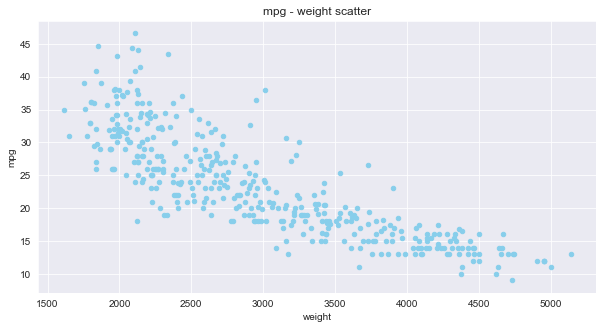

In [116]:
df.plot(kind='scatter', x='weight', y='mpg', figsize=(10,5), color='skyblue',
       alpha=1)
plt.title('mpg - weight scatter')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

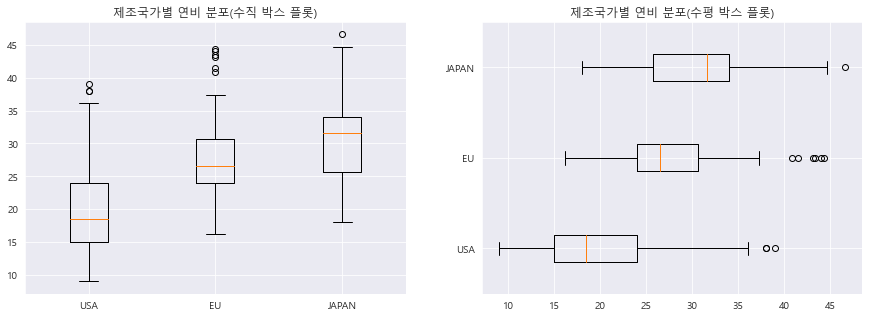

In [119]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

In [120]:
df.origin.replace({1 : 'USA', 2: "EU", 3: 'JPN'}, inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 28.1+ KB
